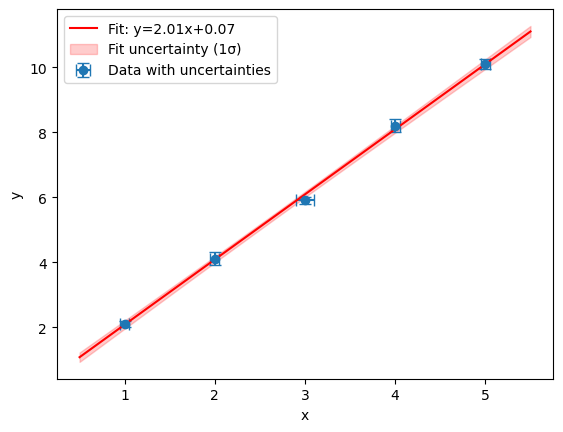

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import ODR, Model, RealData

# Example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.1, 4.1, 5.9, 8.2, 10.1])
sx = np.array([0.05, 0.05, 0.1, 0.05, 0.05])
sy = np.array([0.1, 0.2, 0.1, 0.2, 0.15])

# Linear model
def f(B, x):
    return B[0]*x + B[1]

linear = Model(f)
data = RealData(x, y, sx=sx, sy=sy)
odr = ODR(data, linear, beta0=[2, 0])
out = odr.run()

slope, intercept = out.beta
cov = out.cov_beta      # covariance matrix [[var_m, cov],[cov, var_b]]
var_m, var_b = cov[0,0], cov[1,1]
cov_mb = cov[0,1]

# Prediction line
x_fit = np.linspace(min(x)-0.5, max(x)+0.5, 300)
y_fit = slope*x_fit + intercept

# Uncertainty on prediction
sigma_y = np.sqrt(var_m*x_fit**2 + var_b + 2*cov_mb*x_fit)

# Plot
plt.errorbar(x, y, xerr=sx, yerr=sy, fmt='o', capsize=4, label="Data with uncertainties")
plt.plot(x_fit, y_fit, 'r-', label=f"Fit: y={slope:.2f}x+{intercept:.2f}")
plt.fill_between(x_fit, y_fit - sigma_y, y_fit + sigma_y, color='r', alpha=0.2,
                 label="Fit uncertainty (1σ)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
